# Introduction
This worksheet covers material from week 13. You will write functions to implement evaluation metrics for classification and regression problems, and run cross-validation. You will:
 - Use library functions from scikit-learn (https://scikit-learn.org/stable/)
 - Use NumPy and matplotlib
 - Write and call functions in Python
 - Gain understanding of the evaluation metrics used.


Scikit-learn (https://scikit-learn.org/stable/) is a Python library with a wide range of ML algorithms. We will be using some of these algorithms during this course, but we will also be looking at the principles behind the algorithms in order to understand these rather than simply applying functions from libraries.

## If you don't know Python, NumPy, matplotlib
Please work through the Introduction to Python worksheet available on Blackboard

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a 'magic' function `%matplotlib inline` to display plots in the worksheet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Classification
In this question you will use a toy dataset from scikit-learn. You will use functions from scikit-learn to load the data, divide it into training and testing sets, and then fit a simple classifier to the training set. You will then write functions to calculate accuracy, precision, and recall. Finally, you will check your functions against the functions from scikit-learn.

## Part a) Load the data

In [2]:
# scikit-learn comes with a number of toy datasets 
# (https://sklearn.org/datasets/index.html#toy-datasets)
from sklearn import datasets

# Load the wine dataset from sklearn. You may want to take a look at 
# the format of the dataset
wine = datasets.load_wine()

# Save the datapoints into the variable X and the targets into 
# the variable y
X = wine.data
y = wine.target

Take a look at the target values in y. What do you notice about these? Why are these suitable for a classification algorithm rather than a regression algorithm?

In [3]:
#  Look at the values in y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

The values in the output space y are in the finite set $\{0,1,2\}$. Therefore they are suitable for a classification algorithm.

## Part b) Divide the data into training and testing sets
Use the function `train_test_split` from `sklearn.model_selection` to split out the data and targets into training and testing sets.

In [4]:
# We import the function train_test_split from sklearn and use this to 
# split the data
from sklearn.model_selection import train_test_split

# The function returns splits of each array passed in. 
# The proportion to be used as the training set is given by test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

142
36
142
36


## Part c) Import the k-nearest neighbours classifier and run it on the data
Scikit-learn has a huge range of *estimators* that you can use with your dataset. An estimator is any procedure that can be used to fit data and make predictions from it. Here we will import the k-nearest neighbours classifier, instantiate it, run it on our training set, and then use it to generate some predictions. You will learn more about k-nearest neighbours in Week 14. For now, we are simply using it to generate some predictions.

The general procedure for using the estimators in scikit-learn is as follows. Every estimator has a method `fit(X, y)` and a method `predict(T)`. 

1) Import the estimator
    e.g. `from sklearn.models import Classifier`
    
2) Instantiate the estimator to a variable
    e.g. `est = Classifier(params)`
    
3) Fit the estimator to the data
    e.g. `est.fit(X, y)`
    
4) Make a prediction
    e.g. `predictions = est.predict(test_data)`
    
You can see an example of this in the code below:

In [6]:
# We first import the classifier
from sklearn.neighbors import KNeighborsClassifier

# We instantiate the classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# We fit the model using our training data
knn.fit(X_train, y_train)

# Finally, we generate predictions on the test data
ypred_test=knn.predict(X_test)

In [7]:
ypred_test

array([1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1])

## Part d) Evaluating the classifier
In this section we will implement functions for accuracy, precision and recall, and compare them with the functions given in sklearn (they should give the same results!)

The wine dataset has 3 classes. We will write functions to compute the accuracy of the classifer, the macro-averaged precision and the macro-averaged recall.

Recall the equations for accuracy, precision, and recall:

$$Accuracy = \frac{\sum_{i = 1}^n 1(y_i = f(x_i))}{n}$$
i.e. the number of correctly classified datapoints as a proportion of all $n$ datapoints

$$Precision_c = \frac{TP_c}{TP_c+FP_c}$$
i.e. the precision for class $c$ is the number of true positives for class $c$ as a proportion of the total number of positive predictions for class $c$

$$Recall_c = \frac{TP_c}{TP_c+FN_c}$$
i.e. the recall for class $c$ is the number of true positives for class $c$ as a proportion of the total number of actual positives for class $c$

The macro-averaged precision and macro-averaged recall are then simply calculated by averaging the precision (or recall) for each class:

$$Precision = \frac{1}{k} \sum_{i = 1}^k Precision_k, \quad Recall = \frac{1}{k} \sum_{i = 1}^k Recall_k$$

We can automatically generate the confusion matrix for our data using the function `confusion_matrix` from `sklearn.metrics`

In [8]:
# Import the function confusion_matrix
from sklearn.metrics import confusion_matrix

# Build the confusion matrix from the target test set y_test 
# and our predicted values ypred_test
cm = confusion_matrix(y_test, ypred_test)

Take a look at the confusion matrix. What should its dimensions be? 

In [9]:
# Look at the confusion matrix cm
cm

array([[15,  0,  0],
       [ 0,  8,  3],
       [ 0,  5,  5]])

Write a function `my_accuracy` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns accuracy.

In [10]:
def my_accuracy(y, pred):
    num_correct = 0
    if len(y)==len(pred):
        for i in range(len(y)):
            if y[i]==pred[i]:
                num_correct += 1
    acc = num_correct/len(pred)
    return acc

In [11]:
my_accuracy(y_test,ypred_test)

0.7777777777777778

Write a function `my_recall_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns recall. 

In [12]:
def my_recall_macro(y, pred):
    cm = confusion_matrix(y, pred)
    recalls = []
    for i in range(len(cm)):
        recalls.append(cm[i,i]/sum(cm[i]))
    recall = np.mean(recalls)
    return recall

In [13]:
my_recall_macro(y_test,ypred_test)

0.7424242424242425

Write a function `my_precision_macro` that takes in two arrays `y` for target values and `pred` for predicted  values, and returns precision. 

In [14]:
def my_precision_macro(y, pred):
    cm = confusion_matrix(y, pred)
    cm = cm.transpose()
    precisions = []
    for i in range(len(cm)):
        precisions.append(cm[i,i]/sum(cm[i]))
    precision = np.mean(precisions)
    return precision  

In [15]:
my_precision_macro(y_test,ypred_test)

0.7467948717948718

Check that your functions match those in sklearn.

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
my_accuracy(y_test, ypred_test) == accuracy_score(y_test, ypred_test)

True

In [17]:
my_recall_macro(y_test, ypred_test)== \
    recall_score(y_test, ypred_test, average='macro')

True

In [18]:
my_precision_macro(y_test, ypred_test)== \
    precision_score(y_test, ypred_test, average='macro')

True

# 2. Regression

In this question we will use sklearn to fit a linear model to some artificial data. You will then implement a function to calculate the mean squared error and a function to calculate $r^2$.

## Part a) Create an artificial dataset
We start off by creating some artificial data.    

In [19]:
# We set up a random number generator (rng), seeded with a number 
# (in this case 10). Using a seed means we can generate the same 
# sequence of pseudorandom numbers, and so we can check results easily.
rng = np.random.default_rng(10) 

# a and b are coefficients for the line
a = 2
b = -1

# Use np.linspace to generate datapoints from 0 to 10 spaced at 0.1
X = np.linspace(0, 10, 101) 

# Create data Y using the equation for a line
Y = a*X + b

# Adds Gaussian noise with mean 0 and standard deviation 3 to the data
Y = Y + 3*rng.standard_normal(len(Y)) 

## Part b) Plot the data on named axes

Text(0, 0.5, 'y')

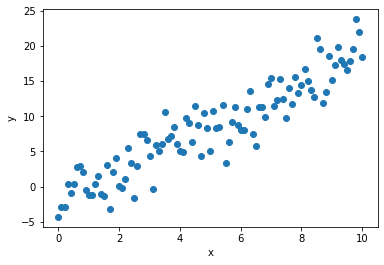

In [20]:
fig, ax = plt.subplots() # Generates a named figure (fig) and axes (ax)
ax.scatter(X, Y, label = 'Data') # Scatterplot of the data on the ax.
plt.xlabel('x')
plt.ylabel('y')

## Part c) Split the data into training and testing sets
Split the data X and targets Y into training and testing sets using the function `train_test_split`. Set the proportion of the dataset to use as test data to 0.1.

In [21]:
# Write your answer here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Part d) Instantiate and fit the estimator
Import the estimator `LinearRegression` from `sklearn.linear_model` and instantiate it. No parameters are needed.

In [22]:
# Write your answer here
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

You will need to reshape the data (but not the targets) before passing it to this model. 

In [23]:
# This reshapes the data to have 1 column and however many rows make 
# sense for the data
X_train = X_train.reshape(-1, 1)

Call the method `fit` with your training data to train the model

In [24]:
# Write your answer here
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The coefficient(s) and intercept for the trained model are called `coef_` and `intercept_`. Are these what you would expect? Are they similar to the values of `a` and `b` that we used to generate the data?

In [25]:
# Look at coef_ and intercept_
print(lin_reg.coef_)
print(a)
print(lin_reg.intercept_)
print(b)

[2.04096152]
2
-1.7630153898158962
-1


Using the values stored in `coef_` and `intercept_`, plot a line representing the fitted model on the same axes (`ax`) as before. Type `fig` to view the plot.

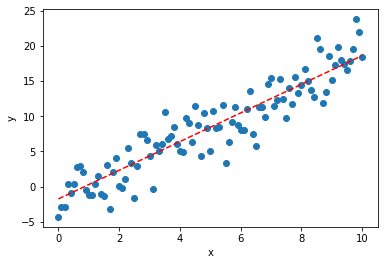

In [26]:
# Write your answer here
Y_line = lin_reg.coef_[0]*X + lin_reg.intercept_
ax.plot(X,Y_line,"r--")
fig

Reshape the test data to have one column and then call `predict` on the regression model to get the predicted y values

In [27]:
X_test = X_test.reshape(-1, 1)
# Call predict on the regression model and assign the output to 
# a variable ypred
Y_test_pred = lin_reg.predict(X_test)

In [28]:
print(Y_test_pred)
print(Y_test)

[ 2.31890765 12.3196191  15.78925368 17.21792674 13.74829216  1.70661919
 15.38106138 11.50323449  8.0335999  18.03431135 14.76877292]
[ 0.04393318 14.6352283  19.51982582 17.98636731 13.99729527 -3.15505509
 12.7806293   5.75886297 10.4176369  19.56005278 16.75824   ]


## Part e) Calculating mean squared error
The equation for the mean squared error is 
$$ MSE = \frac{\sum_{i = 1}^n (y_i - f(\vec{x}_i))^2}{n} $$
Write a function that takes in arrays for the target values `y` and the predicted values `pred` and returns the mean squared error.

In [29]:
(Y_test_pred - Y_test)**2

array([ 5.17550883,  5.36204597, 13.91716849,  0.5905009 ,  0.06200255,
       23.63587684,  6.76224696, 32.99780411,  5.68363238,  2.3278869 ,
        3.95797928])

In [30]:
# Fill in the body of the function
def MSE(y, pred):
    sq_diff = (y-pred)**2
    return sum(sq_diff)/len(sq_diff)

Check your function against the function `mean_squared_error` from `sklearn.metrics`

In [31]:
MSE(Y_test,Y_test_pred)

9.133877564882024

In [32]:
# Write your answer here
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_test_pred) == MSE(Y_test,Y_test_pred)

False

## Part f) Calculating R^2
Recall from the lecture that $R^2$ is defined as

$$R^2(y, \hat{y})) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

This represents the proportion of the variance of y that is explained by the independent variables in the model. It is essentially a comparison of the fitted model with the mean of the target values ($\bar{y}$). Implement your own function to calculate $R^2$ and then compare it with `r2_score` from `sklearn.metrics`

In [33]:
Y_test

array([ 0.04393318, 14.6352283 , 19.51982582, 17.98636731, 13.99729527,
       -3.15505509, 12.7806293 ,  5.75886297, 10.4176369 , 19.56005278,
       16.75824   ])

In [34]:
# Fill in the body of the function
def rsq(y, pred):
    sq_diff_pred = (y-pred)**2
    sq_diff_mean = (y-np.mean(y))**2
    return 1-sum(sq_diff_pred)/sum(sq_diff_mean)

In [35]:
rsq(Y_test,Y_test_pred)

0.8315796859512636

In [36]:
# Compare with sklearn.metrics.r2_score
from sklearn.metrics import r2_score
r2_score(Y_test,Y_test_pred) == rsq(Y_test,Y_test_pred)

True

# 3. Using cross-validation for model selection

In this section we will fit a series of classifiers with different parameter settings, and use k-fold cross validation to select the most appropriate parameter values. We will use a *decision tree* classifier. We will cover this classifier in more detail in future lectures. For now, all you need to know is that a decision tree has a parameter `max_depth` that says how many layers the tree may have. More layers means that the tree can divide up the feature space into finer classes, but this could come at the expense of overfitting.

## Part a) Creating an artificial dataset
We first of all create an artificial dataset with 2000 samples, 10 features, and 4 classes.

In [37]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 2000, n_features = 10, \
                           n_classes=4, n_informative = 3, random_state=10)

In [38]:
make_classification?

Use the function `train_test_split` to separate out 0.2 of your dataset. This will be kept aside as our held-out test set.

In [39]:
# Write your answer here. 
# Assign the splits to variables Xtr, Xtest, ytr, ytest
Xtr, Xtest, ytr, ytest = train_test_split(X,y,test_size=0.1)

In [40]:
[len(Xtr),len(Xtest),len(ytr),len(ytest)]

[1800, 200, 1800, 200]

## Part b) Setting up k-fold cross validation
We import the function `KFold` from `sklearn.model_selection`, and instantiate it with 10 folds.

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=63, shuffle=True)

## Part c) Running cross-validation for different parameter settings
We import the decision tree classifier and run it over depths from 1 to `max_d`. For each depth we run cross-validation over the training set. Write the missing code in the cell below.

In [43]:
from sklearn.tree import DecisionTreeClassifier
max_d = 20
#Set up variables to store training and validation accuracies. 
train_accuracies = [[] for _ in range(max_d)]
val_accuracies = [[] for _ in range(max_d)]

# Loop over depths
for d in range(max_d):
    #Instantiate the DecisionTreeClassifier here. 
    #Set the parameter max_depth to d+1
    #We add 1 because d ranges from 0 to max_d-1, 
    #but we want depths from 1 to max_d
    dtc = DecisionTreeClassifier(max_depth=d+1)
    
    #Loop over cross-validation splits. 
    #Note that we perform cross validation on our training data Xtr.
    #We keep our testing data Xtest aside
    for train_index, val_index in kf.split(Xtr):
        Xtrain, Xval = Xtr[train_index], Xtr[val_index]
        ytrain, yval = ytr[train_index], ytr[val_index]
        
        #Fit the classifier on Xtrain and Ytrain
        dtc.fit(Xtrain, ytrain)
        
        #Make predictions on Xtrain and assign to a variable pred_train
        pred_train = dtc.predict(Xtrain)
        
        #Make predictions on Xval and assign to a variable pred_val
        pred_val = dtc.predict(Xval)
        
        #Calculate the accuracy of the predictions on the training set 
        #and save in the variable train_accuracies
        train_accuracies[d].append(accuracy_score(ytrain, pred_train))
        
        #Do the same for the predictions on the validation set
        val_accuracies[d].append(accuracy_score(yval, pred_val))

#Calculate the mean and standard deviation for training 
#and validation accuracies for each depth across splits 
train_accuracy_mean = np.mean(train_accuracies, axis=1)
# Complete the lines and uncomment
train_accuracy_stdev = np.std(train_accuracies, axis=1)
val_accuracy_mean = np.mean(val_accuracies, axis=1)
val_accuracy_stdev = np.std(val_accuracies, axis=1)

# The arrays of means and standard deviation should have shape (max_d, ). 
# The following will generate an error if not.
assert(np.shape(train_accuracy_mean)==(max_d,))
assert(np.shape(train_accuracy_stdev)==(max_d,))
assert(np.shape(val_accuracy_mean)==(max_d,))
assert(np.shape(val_accuracy_stdev)==(max_d,))

## Plotting results

Plot the mean accuracy attained on the training set and on the validation set at each depth. Your figure should look something like the following:

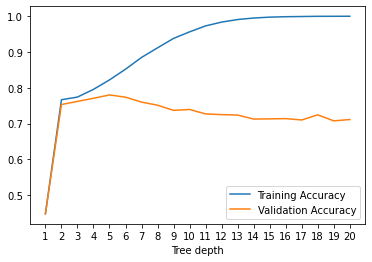

What do you notice about these results? Which value of max_depth would you use for your held-out test set?

In [ ]:
# Write code to plot your results here

## Computing accuracy on the test set
Based on your plotted results, decide on the best value of `max_depth` to use in your decision tree classifier. Instantiate a new classifier with your chosen value. Fit the model on the training data. Make a prediction on the held-out test data, and calculate the accuracy on the test data. Is the accuracy what you expected? If not, why not?


In [ ]:
#Instantiate a new classifier with your chosen value of max_depth

#Fit the classifier on the training data

#Make a prediction on the test data

#Calculate the accuracy on the test data
